In [1]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()

In [3]:
!pip install sklearn-pandas

In [4]:
# read data -> add features for the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
import torch
import torchtuples as tt
from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv


In [5]:
df_train = metabric.read_df()
df_train = df_train.sample(frac=1)  # shuffle dataset


In [11]:
cols_standardize = ['x0', 'x1', 'x2', 'x3', 'x8']
cols_leave = ['x4', 'x5', 'x6', 'x7']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

x_train = x_mapper.fit_transform(df_train).astype('float32')
y_train = df_train[['duration', 'event']].values


In [12]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)


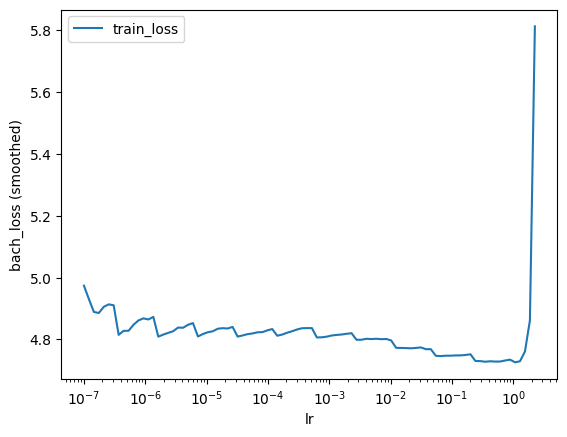

In [15]:
model = CoxPH(net, tt.optim.Adam)
batch_size = 256
durations_train, events_train = y_train[:, 0], y_train[:, 1]
lrfinder = model.lr_finder(x_train, (durations_train, events_train), batch_size, tolerance=10)

_ = lrfinder.plot()


In [18]:
lr = 0.01
model.optimizer.set_lr(lr)
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

log = model.fit(x_train, (durations_train, events_train), batch_size, epochs, callbacks, verbose)


0:	[0s / 0s],		train_loss: 4.7035
1:	[0s / 0s],		train_loss: 4.6256
2:	[0s / 0s],		train_loss: 4.6048
3:	[0s / 0s],		train_loss: 4.6103
4:	[0s / 0s],		train_loss: 4.5825
5:	[0s / 0s],		train_loss: 4.5782
6:	[0s / 0s],		train_loss: 4.5663
7:	[0s / 0s],		train_loss: 4.5597
8:	[0s / 0s],		train_loss: 4.5666
9:	[0s / 0s],		train_loss: 4.5793
